In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import xlogy

# 自带特征重要性
from autogluon.tabular import TabularDataset, TabularPredictor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SMOTEN, BorderlineSMOTE
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, NearMiss, EditedNearestNeighbours, AllKNN, CondensedNearestNeighbour, OneSidedSelection, RepeatedEditedNearestNeighbours, NeighbourhoodCleaningRule, InstanceHardnessThreshold
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier

C:\Users\Dell\.conda\envs\automl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 数据预处理

In [2]:
def data_preprocess(path):
    df = pd.read_csv(path, encoding='gbk', dtype=float)
    # 哑变量处理
    raw_col = ['a1b1_a', 'a1e1', 'a1_1', 'a2', 'a3', 'a4a', 'a5', 'b1', 'b8b', 'c1_0', 'c3a',
                'd1_1', 'd1_2', 'd1_3', 'd1_4', 'd1_5', 'd1_6', 'd1_7', 'd1_8', 'd1_9', 'd1_10', 'd1_11',
                'd4b2_1', 'd4b2_2', 'd4b2_3', 'd4b2_4', 'd4b2_5', 'd4b2_6', 'd4b2_7', 'd4b2_8', 'd4b2_9', 'd4b2_10', 'd4b2_11',
                'd4b3_1', 'd4b3_2', 'd4b3_3', 'd4b3_4', 'd4b3_5', 'd4b3_6', 'e1a_1', 'e1a_2', 'e1a_3', 'e1a_4', 'e1a_5', 'e1a_6',
                'f4b2_1', 'f4b2_2', 'f4b2_3', 'f4b3_1', 'f4b3_2', 'f4b3_3','g4a', 'g4b',
                'g5_1', 'g5_2', 'g5_3', 'g5_4', 'g5_5', 'g5_6', 'g5_7', 'g5_8', 'g5_9', 'g5_10', 'g5_12', 'g5_13', 'g5_14', 'g5_11', 'g5_15',
                'g7_1', 'g7_2', 'g7_3', 'g7_4', 'g7_5', 'g7_6', 'g7_7', 'g7_8', 'g7_9', 'g7_10', 'g7_11', 'g7_12', 'g7_13', 'g7_14', 'g7_15', 'g7_16', 'g7_17', 'g7_18', 'g7_19', 'g7_20', 'g7_21',
                'h1a_1', 'h1a_2', 'h1a_3', 'h1a_4', 'h1a_5', 'h1a_6', 'h1c_a',
                'i1_1', 'i1_2', 'i1_3', 'i1_4', 'i1_5', 'i1_6', 'i1_7', 'i1_8', 'i1_9', 'i1_10', 'i1_12', 'i1_13', 'i1_11',
                'i6', 'i7', 'i8_1', 'i8_2', 'i8_3', 'i8_4', 'i8_5', 'i8_6', 'i8_7', 'i8_8',
                'i9_1', 'i9_2', 'i9_3', 'i9_4', 'i9_5', 'i9_6', 'i9_7', 'i9_8', 'i9_9', 'i9_10', 'i9_11', 'i9_12', 'i9_13', 'i9_14',
                'cx2', 'dzx']
    dummies_col = [df]
    for i in range(len(raw_col)):
        dummies_col.append(pd.get_dummies(df[raw_col[i]], prefix=raw_col[i]))
    
    df = pd.concat(dummies_col, axis=1)
    df.drop(columns=raw_col, axis=1, inplace=True)
    df.drop(columns = ['ID'], inplace=True)

    y = df['tag']
    df = df.drop(columns = ['tag'])
    x = df
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    y_train = y_train.astype('int')
    y_test = y_test.astype('int')

    return X_train, X_test, y_train, y_test

# 数据采样

In [3]:
# 数据采样方法
sampling_methods = {
    'None': None,
    # -- 上采样方法 --
    # 'RandomOverSampler': RandomOverSampler(random_state=42),
    # 'SMOTE': SMOTE(),
    # 'ADASYN': ADASYN(),
    # 'BorderlineSMOTE': BorderlineSMOTE(),
    # 'SMOTEN': SMOTEN(),
    # -- 下采样方法 --
    # 'ClusterCentroids': ClusterCentroids(random_state=42),
   # 'RandomUnderSampler': RandomUnderSampler(random_state=42),
    # 'NearMiss-1': NearMiss(version=1),
    # 'NearMiss-2': NearMiss(version=2),
    # 'NearMiss-3': NearMiss(version=3),
    # 'EditedNearestNeighbours': EditedNearestNeighbours(),
    # 'AllKNN': AllKNN(),
    # 'CondensedNearestNeighbour': CondensedNearestNeighbour(random_state=42),
    # 'OneSidedSelection': OneSidedSelection(random_state=42),
    # 'RepeatedEditedNearestNeighbours': RepeatedEditedNearestNeighbours(),
    # 'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule(),
    # 'InstanceHardnessThreshold': InstanceHardnessThreshold(random_state=42, estimator=LogisticRegression(solver='lbfgs', multi_class='auto')),
    # -- 上采样和下采样混合方法 --
    # 'SMOTEENN': SMOTEENN(random_state=42),
    # 'SMOTETomek': SMOTETomek(random_state=42)
}


# 定义模型

In [4]:
# AdaCast
class AdaCostClassifier(AdaBoostClassifier):
    
    def _boost_real(self, iboost, X, y, sample_weight, random_state):
        '''
        权重更新的公式在这里
        '''
        estimator = self._make_estimator(random_state=random_state)
        estimator.fit(X, y, sample_weight=sample_weight)

        y_predict_proba = estimator.predict_proba(X)

        if iboost == 0:
            self.classes_ = getattr(estimator, 'classes_', None) # 获取estimator的classes_属性值
            self.n_classes_ = len(self.classes_)

        y_predict = self.classes_.take(np.argmax(y_predict_proba, axis=1), axis=0)

        # 分类不正确的实例
        incorrect = y_predict != y

        # 误差分数
        estimator_error = np.mean(np.average(incorrect, weights=sample_weight, axis=0))

        # 如果分类器完美，那么就停止
        if estimator_error <= 0:
            return sample_weight, 1.0, 0.0

        n_classes = self.n_classes_
        classes = self.classes_
        y_codes = np.array([-1.0 / (n_classes - 1), 1.0])
        y_coding = y_codes.take(classes == y[:, np.newaxis])

        proba = y_predict_proba  # 别名
        np.clip(proba, np.finfo(proba.dtype).eps, None, out=proba)

        estimator_weight = (
            -1.0
            * self.learning_rate
            * ((n_classes - 1.0) / n_classes)
            * xlogy(y_coding, y_predict_proba).sum(axis=1)
        )

        # 在此处更新，增加代价敏感系数
        if not iboost == self.n_estimators - 1:
            # Only boost positive weights
            sample_weight *= np.exp(
                estimator_weight * ((sample_weight > 0) | (estimator_weight < 0)) * self._beta(y, y_predict)
            )

        return sample_weight, 1.0, estimator_error

    def _beta(self, y, y_hat):
        '''
        代价调整函数
        '''
        res = []
        for i in zip(y, y_hat):
            if i[0] == i[1]:
                res.append(1) # 正确分类，系数保持不变
            elif i[0] == 1 and i[1] == -1:
                res.append(1) # 将正类（好人）判断为负类（坏人）代价更大，系数增大
            elif i[0] == -1 and i[1] == 1:
                res.append(ADACAST_FACTOR) # 将负类（坏人）判断为正类（好人）代价更大，系数增大
            else:
                print(i[0], i[1])

        return np.array(res)

In [5]:
# AutoGluon
def auto_gluon(X_train, y_train, X_test, y_test, **args):
    # 分别合并训练数据和标签、测试数据和标签
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)
    train_data = TabularDataset(train_data)
    test_data = TabularDataset(test_data)

    # 训练
    predictor = TabularPredictor(label='tag', path='ag_models').fit(train_data)
    
    # 预测
    test_data_nolab = test_data.drop(columns = ['tag'])
    # predictor = TabularPredictor.load('ag_models')
    y_pred = predictor.predict(test_data_nolab)
    print(predictor.leaderboard(test_data, silent=True))
    # 特征重要性
    feature_importance = predictor.feature_importance(test_data, silent=True)
    return y_pred, feature_importance

# BaggingDT
def BaggingDT(X_train, y_train, X_test, y_test, **args):
    bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
    bc.fit(X_train, y_train)
    y_pred = bc.predict(X_test)
    return y_pred, None

# BalancedBaggingDT
def BalancedBaggingDT(X_train, y_train, X_test, y_test, **args):
    bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                    n_estimators=100,
                                    sampling_strategy='auto',
                                    replacement=False,
                                    random_state=42)
    bbc.fit(X_train, y_train)
    y_pred = bbc.predict(X_test)
    return y_pred, None

# BalancedRF
def BalancedRF(X_train, y_train, X_test, y_test, **args):
    brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
    brf.fit(X_train, y_train)
    y_pred = brf.predict(X_test)
    return y_pred, None

# RUSBoost
def RUSBoost(X_train, y_train, X_test, y_test, **args):
    rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                                random_state=0)
    rusboost.fit(X_train, y_train)
    y_pred = rusboost.predict(X_test)
    return y_pred, None

# EasyEnsemble
def EasyEnsemble(X_train, y_train, X_test, y_test, **args):
    eec = EasyEnsembleClassifier(random_state=0)
    eec.fit(X_train, y_train)
    y_pred = eec.predict(X_test)
    return y_pred, None

# AdaCast
def AdaCast(X_train, y_train, X_test, y_test, **args):
    acc = AdaCostClassifier(n_estimators=100)
    acc.fit(X_train, y_train)
    y_pred = acc.predict(X_test)

    # 特征重要性
    feature_importance = acc.feature_importances_
    feature_importance = pd.DataFrame(feature_importance, columns=['importance'], index=args['index']) # .tolist()

    # y_pred -1变为1，1变为0
    y_pred = np.where(y_pred == -1, 1, 0)
    return y_pred, feature_importance

# LogisticR
def LogisticR(X_train, y_train, X_test, y_test, **args):
    lr = LogisticRegression(penalty='l2', solver='liblinear',random_state=0)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    # print(np.unique(y_pred))
    return y_pred, None

classifiers = {
    'AutoGluon': auto_gluon,
    # 'BaggingDT': BaggingDT,
    # 'BalancedBaggingDT': BalancedBaggingDT,
    # 'BalancedRF': BalancedRF,
    # 'RUSBoost': RUSBoost,
    # 'EasyEnsemble': EasyEnsemble,
   # 'AdaCast': AdaCast,
    # 'LogisticR': LogisticR,
}

In [6]:
def print_result(y_pred, y_test):
    print('Accuracy: %lf' % accuracy_score(y_test, y_pred))
    print('Balanced Accuracy: %lf' % balanced_accuracy_score(y_test, y_pred))
    print('Precision: %lf' % precision_score(y_test, y_pred))
    print('Recall: %lf' % recall_score(y_test, y_pred))
    print('F1: %lf' % f1_score(y_test, y_pred))
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

def result_to_csv_item(y_pred, y_test):
    item1 = accuracy_score(y_test, y_pred)
    item2 = balanced_accuracy_score(y_test, y_pred)
    item3 = precision_score(y_test, y_pred)
    item4 = recall_score(y_test, y_pred)
    item5 = f1_score(y_test, y_pred)
    item6 = confusion_matrix(y_test, y_pred)
    return f'{item1},{item2},{item3},{item4},{item5},{item6[0][0]},{item6[0][1]},{item6[1][0]},{item6[1][1]}'

In [7]:
def draw_confusion_matrix(y_test, y_pred, suffix='none'):
    try:
        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
        plt.tight_layout()
        os.makedirs('cms', exist_ok=True)
        plt.savefig(fr'cms/confusion_matrix_{suffix}.png')
    except Exception as e:
        print(f'error in draw_confusion_matrix: {e}')

# 训练

In [8]:
def classify_and_sampling(classifier, method, X_train, y_train, X_test, y_test, **args):
    # 采样
    if method:
        X_train, y_train = method.fit_resample(X_train, y_train)
    # 采样后数据集大小
    print('采样后训练集维数为：', X_train.shape, '\n', '样本个数为：', y_train.shape)
    # 训练和评估
    y_pred, feature_importance = classifier(X_train, y_train, X_test, y_test, **args)
    return y_pred, feature_importance

全部模型训练

Beginning AutoGluon training ...
AutoGluon will save models to "ag_models\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    3101
Train Data Columns: 465
Label Column: tag
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    23774.18 MB
	Train Data (Original)  Memory Usage: 3.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_i

训练集维数为： (3101, 465) 	 样本个数为： (3101,)
测试集维数为： (776, 465) 	 样本个数为： (776,)
Classifier: AutoGluon 	Sampling method: None
采样后训练集维数为： (3101, 465) 
 样本个数为： (3101,)


	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Useless Original Features (Count: 1): ['f4b2_1_99.0']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 110 | ['a1', 'a1c1', 'a1d1', 'a6a', 'a6a_2', ...]
		('int', [])   : 354 | ['a1b1_a_1.0', 'a1b1_a_2.0', 'a1e1_1.0', 'a1e1_2.0', 'a1e1_3.0', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 107 | ['a1', 'a1c1', 'a1d1', 'a6a', 'a6a_2', ...]
		('int', ['bool']) : 357 | ['d4a', 'g6_1', 'i1_14', 'a1b1_a_1.0', 'a1b1_a_2.0', ...]
	0.3s = Fit runtime
	464 features in original data used to generate 464 features in processed data.
	Trai

                  model  score_test  score_val  pred_time_test  pred_time_val  \
0   WeightedEnsemble_L2    0.746134      0.744        0.135166       0.095095   
1              CatBoost    0.740979      0.730        0.015627       0.000000   
2              LightGBM    0.724227      0.724        0.000000       0.004983   
3      RandomForestEntr    0.720361      0.680        0.046964       0.029900   
4               XGBoost    0.708763      0.716        0.015637       0.011960   
5      RandomForestGini    0.707474      0.698        0.078653       0.028877   
6            LightGBMXT    0.704897      0.718        0.015619       0.004983   
7        ExtraTreesGini    0.688144      0.648        0.048275       0.043115   
8         LightGBMLarge    0.684278      0.714        0.000000       0.003987   
9        ExtraTreesEntr    0.684278      0.664        0.065027       0.024511   
10      NeuralNetFastAI    0.653351      0.670        0.015818       0.015627   
11       NeuralNetTorch    0

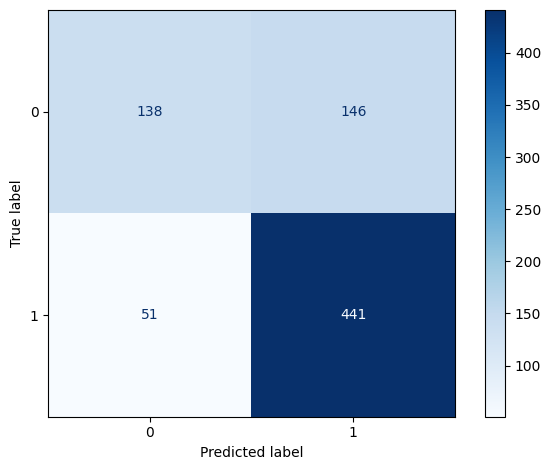

In [9]:
ADACAST_FACTOR = 1
DATA_FILE = '数据集1.csv'
RESULT_FILE = 'result_all.csv'

# 数据预处理
X_train, X_test, y_train, y_test = data_preprocess(DATA_FILE)
print('训练集维数为：', X_train.shape, '\t', '样本个数为：', y_train.shape)
print('测试集维数为：', X_test.shape, '\t', '样本个数为：', y_test.shape)
DATA_COLUMNS = X_train.columns.values

# 保存模型结果
f_res = open(RESULT_FILE, 'a')
os.makedirs('feature_importance', exist_ok=True)

# 写csv头：Model	Sampler	Accuracy	Balanced Accuracy	Precision	Recall	F1-Score	A(0→0)	B(0→1)	C(1→0)	D(1→1)
f_res.write('Model,Sampler,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,A,B,C,D\n')

# 选择模型
for classifier in classifiers:

    if classifier == 'AdaCast':
        # AdaCast需要将标签转换为-1和1
        y_train_ = np.where(y_train == 0, 1, -1)
    else:
        y_train_ = y_train
    
    # 选择采样方法
    for method in sampling_methods:

        print("Classifier:", classifier, '\tSampling method:', method)
        # 训练
        y_pred, feature_importance = classify_and_sampling(classifiers[classifier], sampling_methods[method], X_train, y_train_, X_test, y_test, index=DATA_COLUMNS)
        if feature_importance is not None:
            feature_importance.sort_values(by=['importance'], ascending=False).to_csv(rf'feature_importance/{classifier}_{method}.csv', index=True)
        # 指标
        print_result(y_pred, y_test)
        draw_confusion_matrix(y_test, y_pred, f'{classifier}_{method}')

        f_res.write(f'{classifier},{method},{result_to_csv_item(y_pred, y_test)}\n')    
        print('------------------------------------------')
        f_res.flush()

f_res.close()

AdaCast 不同系数训练

训练集维数为： (3101, 439) 	 样本个数为： (3101,)
测试集维数为： (776, 439) 	 样本个数为： (776,)
Classifier: AdaCast 1.15 	Sampling method: None
采样后训练集维数为： (3101, 439) 
 样本个数为： (3101,)
Accuracy: 0.717784
Balanced Accuracy: 0.657606
Precision: 0.729412
Recall: 0.882114
F1: 0.798528
Confusion Matrix: [[123 161]
 [ 58 434]]
------------------------------------------
Classifier: AdaCast 1.15 	Sampling method: RandomUnderSampler
采样后训练集维数为： (2270, 439) 
 样本个数为： (2270,)
Accuracy: 0.673969
Balanced Accuracy: 0.651337
Precision: 0.746392
Recall: 0.735772
F1: 0.741044
Confusion Matrix: [[161 123]
 [130 362]]
------------------------------------------


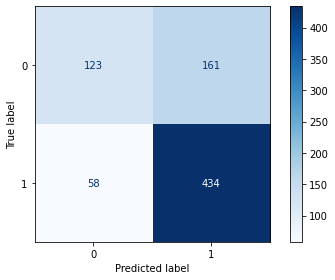

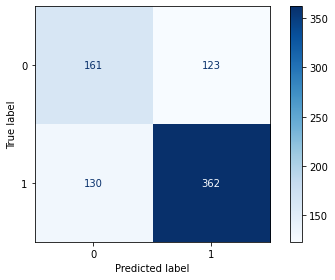

In [22]:
ADACAST_FACTOR = 1
DATA_FILE = '数据集0314.csv'
RESULT_FILE = 'result_adcast.csv'

# 数据预处理
X_train, X_test, y_train, y_test = data_preprocess(DATA_FILE)
print('训练集维数为：', X_train.shape, '\t', '样本个数为：', y_train.shape)
print('测试集维数为：', X_test.shape, '\t', '样本个数为：', y_test.shape)
DATA_COLUMNS = X_train.columns.values

# 保存模型结果
f_res = open(RESULT_FILE, 'a')
os.makedirs('feature_importance', exist_ok=True)

# 写csv头：Model	Sampler	Accuracy	Balanced Accuracy	Precision	Recall	F1-Score	A(0→0)	B(0→1)	C(1→0)	D(1→1)
f_res.write('Model,Sampler,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score,A,B,C,D\n')

classifier = 'AdaCast'

# AdaCast需要将标签转换为-1和1
y_train = np.where(y_train == 0, 1, -1)

# for i in np.arange(1, 3.05, 0.05):
for i in [1.15]:
    ADACAST_FACTOR = i

    # 选择采样方法
    for method in sampling_methods:

        print("Classifier:", classifier, ADACAST_FACTOR, '\tSampling method:', method)
        # 训练
        y_pred, feature_importance = classify_and_sampling(classifiers[classifier], sampling_methods[method], X_train, y_train, X_test, y_test, index=DATA_COLUMNS)
        if feature_importance is not None:
            feature_importance.sort_values(by=['importance'], ascending=False).to_csv(rf'feature_importance/AdaCast({ADACAST_FACTOR:.2f})_{method}.csv', index=True)
        # 指标
        print_result(y_pred, y_test)
        draw_confusion_matrix(y_test, y_pred, f'{classifier}({ADACAST_FACTOR:.2f})_{method}')

        f_res.write(f'{classifier}({ADACAST_FACTOR:.2f}),{method},{result_to_csv_item(y_pred, y_test)}\n')    
        print('------------------------------------------')
        f_res.flush()

f_res.close()